In [43]:
import numpy as np
import datetime
start=datetime.datetime.now()
print(start)

2021-12-03 00:08:53.807581


In [44]:
import os
cwd = os.getcwd()
print(cwd)

C:\Users\tmj89\Desktop\Codes


In [45]:
# -*- coding: utf-8 -*-
import pandas as pd
load = pd.read_csv(r'C:\Users\tmj89\Desktop\Codes\dataset_train_4_0to200.csv')

In [46]:
load.head

<bound method NDFrame.head of       Delivery Date  Delivery Hour Repeated Hour Flag Settlement Point Name  \
0          1/1/2015              1                  N            LZ_HOUSTON   
1          1/1/2015              2                  N            LZ_HOUSTON   
2          1/1/2015              3                  N            LZ_HOUSTON   
3          1/1/2015              4                  N            LZ_HOUSTON   
4          1/1/2015              5                  N            LZ_HOUSTON   
...             ...            ...                ...                   ...   
34633    12/31/2018             20                  N            LZ_HOUSTON   
34634    12/31/2018             21                  N            LZ_HOUSTON   
34635    12/31/2018             22                  N            LZ_HOUSTON   
34636    12/31/2018             23                  N            LZ_HOUSTON   
34637    12/31/2018             24                  N            LZ_HOUSTON   

      Settlement Poin

In [47]:
load.dtypes

import datetime
load['year'] = pd.DatetimeIndex(load['Delivery Date']).year
load['day'] = pd.DatetimeIndex(load['Delivery Date']).day# Extracting Day from "Delivery Date"
load['month'] = pd.DatetimeIndex(load['Delivery Date']).month   # Extracting Month from "Delivery Date"


a = load['Delivery Date']
a= pd.to_datetime(a)

load['dayofweek'] = a.dt.dayofweek
load['dayofweek']

0        3
1        3
2        3
3        3
4        3
        ..
34633    0
34634    0
34635    0
34636    0
34637    0
Name: dayofweek, Length: 34638, dtype: int64

In [48]:
load = load.set_index(['Delivery Date']) 
load = load.drop(columns=['year','day','Settlement Point Name','Settlement Point Type'], axis=1)  
# Re-arranging Columns
load = load[['dayofweek','month','Delivery Hour','Temperature in F','Load in Houston', 'Settlement Point Price']]
load.head()

,dayofweek,month,Delivery Hour,Temperature in F,Load in Houston,Settlement Point Price
Delivery Date,,,,,,
1/1/2015,3,1,1,44,9844.20,22.47
1/1/2015,3,1,2,44,9653.46,22.31
1/1/2015,3,1,3,44,9502.30,22.20
1/1/2015,3,1,4,44,9474.48,22.13
1/1/2015,3,1,5,44,9554.37,22.16


In [49]:
load.dtypes

dayofweek                   int64
month                       int64
Delivery Hour               int64
Temperature in F            int64
Load in Houston           float64
Settlement Point Price    float64
dtype: object

In [50]:
# Removing "," from columns "Load in Houston" , "Ercot Load" and "Settlement Point Price"
load['Load in Houston'] = load['Load in Houston'].astype(str).str.replace(r',', '')
#load['Ercot Load'] = load['Ercot Load'].astype(str).str.replace(r',', '')
load['Settlement Point Price'] = load['Settlement Point Price'].astype(str).str.replace(r',', '')
load.head()


,dayofweek,month,Delivery Hour,Temperature in F,Load in Houston,Settlement Point Price
Delivery Date,,,,,,
1/1/2015,3,1,1,44,9844.2,22.47
1/1/2015,3,1,2,44,9653.46,22.31
1/1/2015,3,1,3,44,9502.3,22.2
1/1/2015,3,1,4,44,9474.48,22.13
1/1/2015,3,1,5,44,9554.37,22.16


In [51]:
load['Settlement Point Price'] = load['Settlement Point Price'].astype(float)
load['Temperature in F'] = load['Temperature in F'].astype(float)
load['Load in Houston'] = load['Load in Houston'].astype(float)
#load['Ercot Load'] = load['Ercot Load'].astype(float)
load['Settlement Point Price'] = round(load['Settlement Point Price'],2)
load.dtypes
#dataset = load.values

dayofweek                   int64
month                       int64
Delivery Hour               int64
Temperature in F          float64
Load in Houston           float64
Settlement Point Price    float64
dtype: object

In [94]:
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, QuantileTransformer, PowerTransformer
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([("1",OneHotEncoder(sparse=False),make_column_selector(pattern = 'month')),
                             ("2",OneHotEncoder(sparse=False),make_column_selector(pattern = 'dayofweek')),
                             ("3",OneHotEncoder(sparse=False),make_column_selector(pattern = 'Delivery Hour')),
                             #("4",OneHotEncoder(sparse=False),make_column_selector(pattern = 'Delivery Interval')),
                             #("6",OneHotEncoder(sparse=False),make_column_selector(pattern = 'DayStatus')),
                             ("7",StandardScaler(copy=True), make_column_selector(pattern = 'Temperature in F')),
                             ("8",StandardScaler(copy=True), make_column_selector(pattern = 'Load in Houston')),
                             #("9",StandardScaler(copy=True), make_column_selector(pattern = 'Ercot Load')),
                             #("10",StandardScaler(copy=True),make_column_selector(pattern = 'Rise')),
                             ("y",StandardScaler(copy=True), make_column_selector(pattern = 'Settlement Point Price'))])

In [95]:
import numpy
dataset=load.values
#numpy.around(dataset, decimals=2, out=None)
normed_data = ct.fit_transform(load)
print(normed_data.shape)


(34638, 46)


In [96]:
from sklearn.model_selection import train_test_split

# splitting dataset into 'training dataset' and 'validation and test dataset'
Train, Test = train_test_split(normed_data, test_size=0.1, shuffle = False)

print(Train.shape, Test.shape)

(31174, 46) (3464, 46)


In [97]:
Test[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  1.98140551,  0.6878887 ,
       -0.17122064])

In [98]:
train_labels = Train[:,(Train.shape[1]-1)]

In [123]:
test_labels = Test[:,(Test.shape[1]-1)].reshape(-1,1)
test_labels[0]

array([-0.17122064])

In [100]:
print(train_labels.shape, test_labels.shape)

(31174,) (3464,)


In [101]:
train_labels

array([-0.0636385 , -0.07057928, -0.07535107, ...,  0.34716911,
        0.1853621 , -0.02416279])

In [102]:
test_labels

array([-0.17122064, -0.22197512, -0.24409887, ..., -0.34257123,
       -0.32738827, -0.37120196])

In [103]:
Xtrain = Train[:,0:(Train.shape[1]-1)]
Xtrain[0]

array([ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -1.74483262, -0.75033036])

In [104]:
Xtest = Test[:,0:(Test.shape[1]-1)]
Xtest[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 1.98140551, 0.6878887 ])

In [105]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers


In [106]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[Xtrain.shape[1],]),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
  ])

In [107]:
from tensorflow import keras
from keras import backend as K
from keras.callbacks import ReduceLROnPlateau, TensorBoard, ModelCheckpoint
#lr_schedule = keras.optimizers.schedules.ExponentialDecay(5e-4,
#                                               decay_steps=1000000,
#                                               decay_rate=0.98,
#                                                  staircase=False)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.2, patience=10, mode='auto')
from tensorflow import keras
optimizer = keras.optimizers.Adam(lr=0.01, beta_1=1e-6)

In [108]:
optimizer = optimizers.Adam()

In [109]:
model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])

In [110]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                2944      
_________________________________________________________________
dense_13 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_14 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_15 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_16 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 33        
Total params: 8,225
Trainable params: 8,225
Non-trainable params: 0
_________________________________________________________________


In [111]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [112]:
example_batch= Xtrain[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.02596701],
       [-0.00311641],
       [-0.02736115],
       [-0.07666118],
       [ 0.00113936],
       [ 0.02010138],
       [-0.04673679],
       [-0.02615586],
       [-0.01401963],
       [ 0.03803068]], dtype=float32)

In [113]:
import datetime
print(datetime.datetime.now())

2021-12-03 00:21:04.158107


In [124]:
EPOCHS = 10
history = model.fit(
  Xtrain, train_labels,
  epochs=EPOCHS, validation_data = (Xtest, test_labels), shuffle=False,batch_size=32, verbose=1,callbacks=[])

Train on 31174 samples, validate on 3464 samples
Epoch 1/10
31174/31174 [==============================] - 1s 44us/sample - loss: 0.3469 - mean_absolute_error: 0.2000 - mean_squared_error: 0.3469 - val_loss: 0.3192 - val_mean_absolute_error: 0.3182 - val_mean_squared_error: 0.3192
Epoch 2/10
31174/31174 [==============================] - 1s 43us/sample - loss: 0.2930 - mean_absolute_error: 0.1998 - mean_squared_error: 0.2930 - val_loss: 0.3115 - val_mean_absolute_error: 0.3148 - val_mean_squared_error: 0.3115
Epoch 3/10
31174/31174 [==============================] - 1s 44us/sample - loss: 0.3215 - mean_absolute_error: 0.1997 - mean_squared_error: 0.3215 - val_loss: 0.3089 - val_mean_absolute_error: 0.3118 - val_mean_squared_error: 0.3089
Epoch 4/10
31174/31174 [==============================] - 1s 42us/sample - loss: 0.3155 - mean_absolute_error: 0.2009 - mean_squared_error: 0.3155 - val_loss: 0.3077 - val_mean_absolute_error: 0.3145 - val_mean_squared_error: 0.3077
Epoch 5/10
31174/31

In [125]:
import datetime
c=datetime.datetime.now()
print(c)
test_predictions = model.predict(Xtest)
print(test_predictions.shape)
op_list= []
for i in range (0, len(test_predictions)):
  op_list.append((test_predictions[i][0]))
len(op_list)

2021-12-03 00:26:53.567240
(3464, 1)


3464

In [129]:
mm= []
for i in range (0, len(test_labels)):
  mm.append((test_labels[i][0]))
test_labels=pd.DataFrame({'actual':mm})
test_labels['actual']=ct.named_transformers_['y'].inverse_transform(test_labels)
test_labels['actual']

0       19.99
1       18.82
2       18.31
3       17.84
4       17.73
        ...  
3459    21.45
3460    18.50
3461    16.04
3462    16.39
3463    15.38
Name: actual, Length: 3464, dtype: float64

In [139]:
predictions=pd.DataFrame({'predict':op_list})
predictions['predict'] = ct.named_transformers_['y'].inverse_transform(predictions)
predictions['predict']

0       21.896700
1       20.896421
2       20.275719
3       20.213457
4       19.323200
          ...    
3459    22.505823
3460    21.662270
3461    19.814987
3462    19.120295
3463    17.422409
Name: predict, Length: 3464, dtype: float32

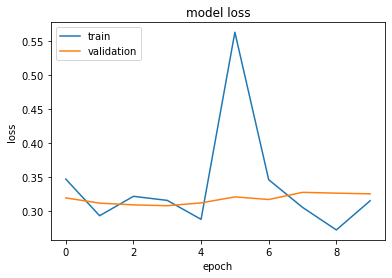

In [131]:

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

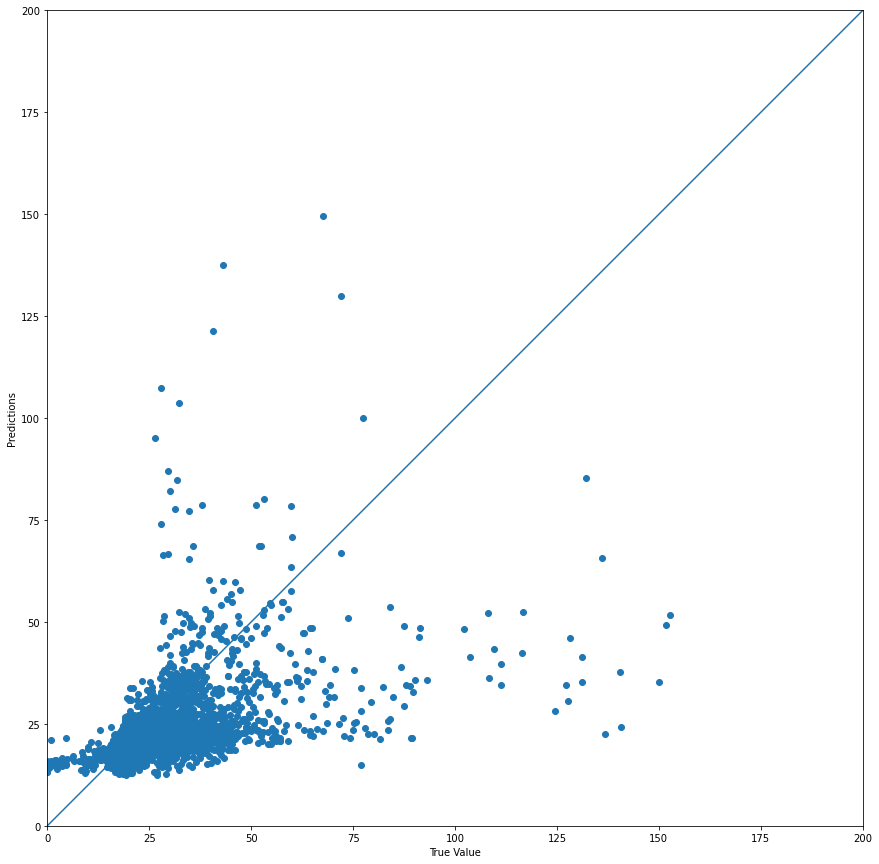

In [148]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15))
a = plt.axes(aspect='equal')
plt.scatter(test_labels['actual'], predictions)
plt.xlabel('True Value')
plt.ylabel('Predictions')
lims = [0, 200]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

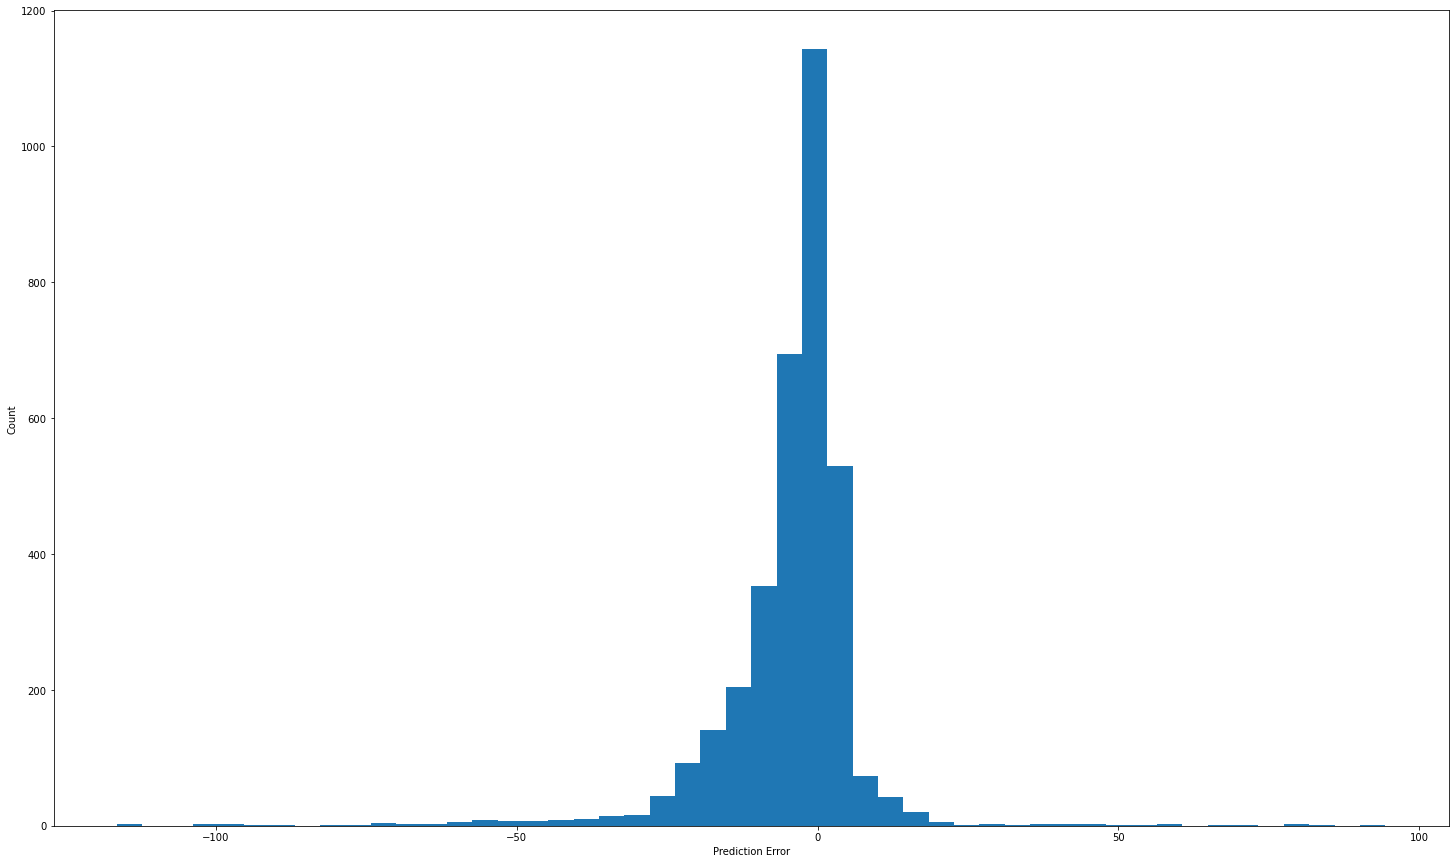

In [149]:
error =predictions['predict']- test_labels['actual']
plt.figure(figsize=(25,15))
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")

In [150]:
print(predictions[0:10], test_labels['actual'][0:10], error[0:10])

     predict
0  21.896700
1  20.896421
2  20.275719
3  20.213457
4  19.323200
5  19.818710
6  20.482082
7  22.791960
8  22.066706
9  23.407032 0    19.99
1    18.82
2    18.31
3    17.84
4    17.73
5    17.59
6    18.22
7    19.18
8    19.51
9    20.30
Name: actual, dtype: float64 0    1.906700
1    2.076421
2    1.965719
3    2.373457
4    1.593200
5    2.228710
6    2.262082
7    3.611960
8    2.556706
9    3.107032
dtype: float64


In [151]:
i=0
count=0
for i in range(len(error)):
    if ((error[i])>3) or ((error[i]<-3)):
        count=count+1
print(count)

1966


In [152]:
a = len(test_predictions) - count
a
accuracy = (a/len(test_predictions))*100
print('accuracy:', accuracy)

accuracy: 43.24480369515011


In [153]:
from statistics import mean, stdev
print('Mean of error in test data:', mean(error))
print('Standard deviation of error in test data:', stdev(error))

Mean of error in test data: -4.597147130129244
Standard deviation of error in test data: 12.316747250655688


In [154]:
from statistics import mean, stdev
print('Mean of error in test data:', mean(np.abs(error)))
print('Standard deviation of error in test data:', mean(np.square(error)))

Mean of error in test data: 7.240866665344591
Standard deviation of error in test data: 172.79223061680574


In [155]:
import datetime
stop=datetime.datetime.now()
print(stop)

2021-12-03 00:33:59.142774


In [156]:
print(stop-start)

0:25:05.335193


In [157]:
from statistics import mean, stdev
print('Mean of test data:', mean(test_labels['actual']))
print('Standard deviation of test data:', stdev(test_labels['actual']))

Mean of test data: 27.91680427251732
Standard deviation of test data: 13.839937893298302


In [158]:
for j in range(1,11):
    i=0
    count=0
    for i in range(len(error)):
        if ((error[i])>j) or ((error[i]<-j)):
            count=count+1
    a = len(predictions) - count
    accuracy = (a/len(predictions))*100
    print("accuracy: with threshold of %i"%j," is %.2f"%accuracy)

accuracy: with threshold of 1  is 16.17
accuracy: with threshold of 2  is 31.84
accuracy: with threshold of 3  is 43.24
accuracy: with threshold of 4  is 52.40
accuracy: with threshold of 5  is 59.64
accuracy: with threshold of 6  is 65.18
accuracy: with threshold of 7  is 69.80
accuracy: with threshold of 8  is 73.30
accuracy: with threshold of 9  is 76.07
accuracy: with threshold of 10  is 78.78
